In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import mplfinance as fplt

In [2]:
import tsemodule5 as tm5

In [3]:
data = tm5.stock('ومعادن',value=1259,standard=True)[::-1]
data.head()

,High,Low,Close,Volume,Open
Date,,,,,
2017-11-05,1472.0,1427.0,1451.0,4542059,1470.0
2017-11-06,1450.0,1428.0,1448.0,1429222,1451.0
2017-11-07,1450.0,1430.0,1443.0,2423801,1448.0
2017-11-08,1442.0,1432.0,1442.0,1194668,1443.0
2017-11-11,1440.0,1425.0,1435.0,3991165,1442.0


In [4]:
data.shape

(1259, 5)

In [5]:
data.index

DatetimeIndex(['2017-11-05', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-11', '2017-11-12', '2017-11-13', '2017-11-14',
               '2017-11-15', '2017-11-18',
               ...
               '2023-06-17', '2023-06-18', '2023-06-19', '2023-06-20',
               '2023-06-21', '2023-06-24', '2023-06-25', '2023-06-26',
               '2023-06-27', '2023-06-28'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [6]:
data.describe()

,High,Low,Close,Volume,Open
count,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,7149.285941,6871.542494,7011.913423,3.305439e+07,6996.813344
std,4344.232877,4142.659496,4240.275838,4.597894e+07,4238.111160
min,1416.000000,1406.000000,1419.000000,5.101620e+05,1419.000000
25%,4340.000000,4192.500000,4273.500000,8.933856e+06,4270.000000
50%,5540.000000,5320.000000,5420.000000,1.733804e+07,5414.000000
75%,10500.000000,10100.000000,10355.000000,3.892908e+07,10280.000000
max,20790.000000,19600.000000,20420.000000,5.866190e+08,20420.000000


In [7]:
data.loc['2017-11-05',:]

High         1472.0
Low          1427.0
Close        1451.0
Volume    4542059.0
Open         1470.0
Name: 2017-11-05 00:00:00, dtype: float64

(array([17897., 17956., 18017., 18078., 18140., 18201., 18262.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01')])

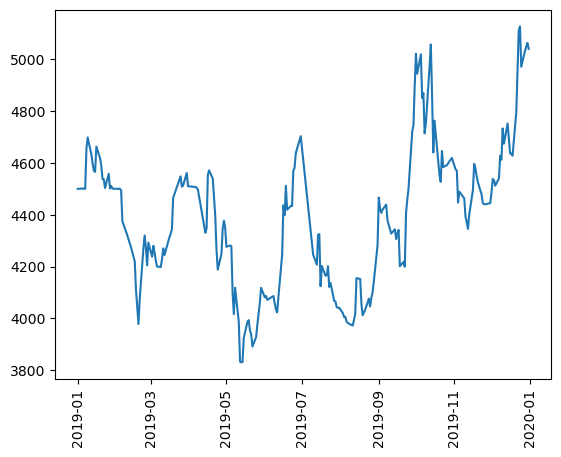

In [8]:
plt.plot(data.loc['2019','Close'])
plt.xticks(rotation=90)

(array([18262., 18266., 18270., 18274., 18278., 18282., 18286., 18290.]),
 [Text(18262.0, 0, '2020-01-01'),
  Text(18266.0, 0, '2020-01-05'),
  Text(18270.0, 0, '2020-01-09'),
  Text(18274.0, 0, '2020-01-13'),
  Text(18278.0, 0, '2020-01-17'),
  Text(18282.0, 0, '2020-01-21'),
  Text(18286.0, 0, '2020-01-25'),
  Text(18290.0, 0, '2020-01-29')])

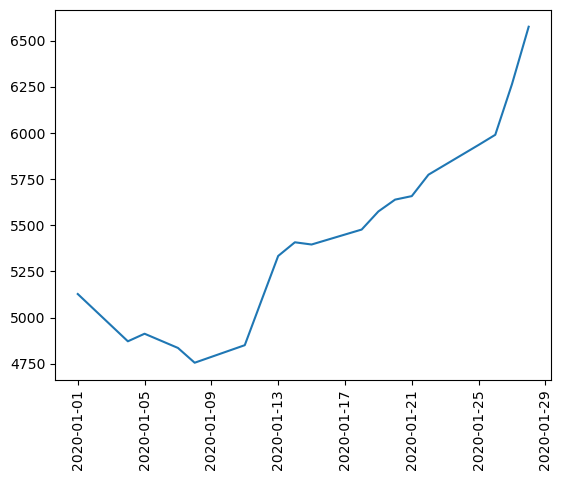

In [9]:
plt.plot(data.loc['2020-01','Close'])
plt.xticks(rotation=90)

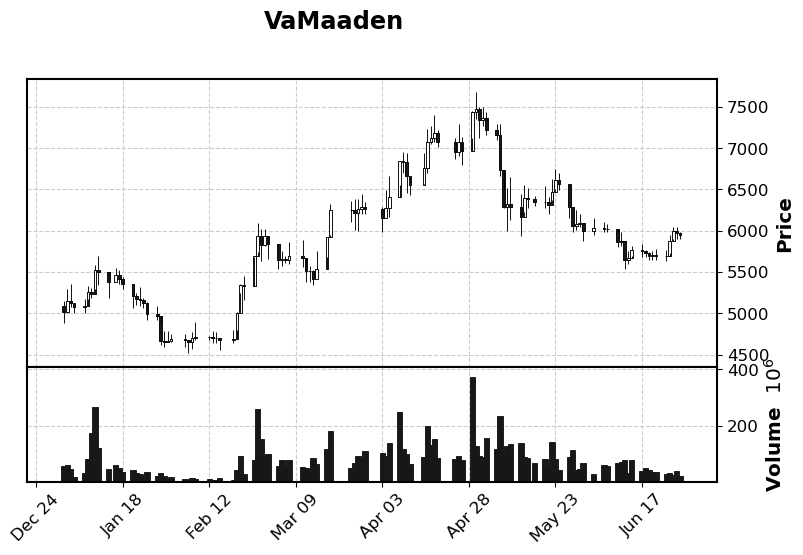

In [10]:
fplt.plot(data.loc['2023-01-01':,:],type= 'candle',
          style='classic',volume=True,show_nontrading=True,
          figratio=(10,6),title='VaMaaden')

In [11]:
data = data[['Open','Close','Volume']]

In [12]:
data = data.rename(columns={'Open':'open',
                    'Close':'close',
                    'Volume':'volume'})
data

,open,close,volume
Date,,,
2017-11-05,1470.0,1451.0,4542059
2017-11-06,1451.0,1448.0,1429222
2017-11-07,1448.0,1443.0,2423801
2017-11-08,1443.0,1442.0,1194668
2017-11-11,1442.0,1435.0,3991165
...,...,...,...
2023-06-24,5700.0,5700.0,30091181
2023-06-25,5700.0,5880.0,32215036
2023-06-26,5880.0,6000.0,26136861


(array([17167., 17532., 17897., 18262., 18628., 18993., 19358.]),
 [Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

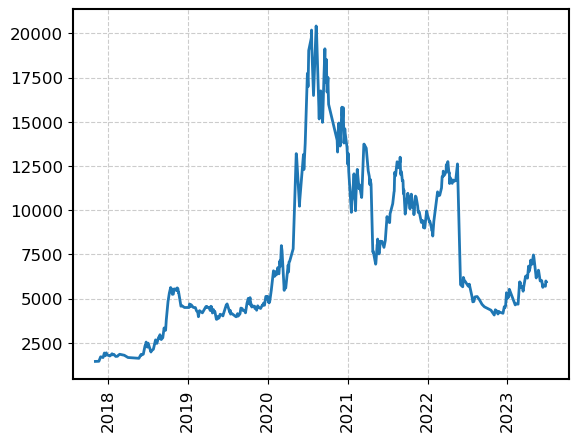

In [13]:
plt.plot(data['close'])
plt.xticks(rotation=90)

In [14]:
data['close_shift'] = data['close'].shift(1)
data['volum_shift'] = data['volume'].shift(1)
data

,open,close,volume,close_shift,volum_shift
Date,,,,,
2017-11-05,1470.0,1451.0,4542059,NaN,NaN
2017-11-06,1451.0,1448.0,1429222,1451.0,4542059.0
2017-11-07,1448.0,1443.0,2423801,1448.0,1429222.0
2017-11-08,1443.0,1442.0,1194668,1443.0,2423801.0
2017-11-11,1442.0,1435.0,3991165,1442.0,1194668.0
...,...,...,...,...,...
2023-06-24,5700.0,5700.0,30091181,5700.0,36309847.0
2023-06-25,5700.0,5880.0,32215036,5700.0,30091181.0
2023-06-26,5880.0,6000.0,26136861,5880.0,32215036.0


In [15]:
data['daily_return'] = data['close'].pct_change()
data['vol_change'] =data['volume'].pct_change()
data

,open,close,volume,close_shift,volum_shift,daily_return,vol_change
Date,,,,,,,
2017-11-05,1470.0,1451.0,4542059,NaN,NaN,NaN,NaN
2017-11-06,1451.0,1448.0,1429222,1451.0,4542059.0,-0.002068,-0.685336
2017-11-07,1448.0,1443.0,2423801,1448.0,1429222.0,-0.003453,0.695888
2017-11-08,1443.0,1442.0,1194668,1443.0,2423801.0,-0.000693,-0.507110
2017-11-11,1442.0,1435.0,3991165,1442.0,1194668.0,-0.004854,2.340815
...,...,...,...,...,...,...,...
2023-06-24,5700.0,5700.0,30091181,5700.0,36309847.0,0.000000,-0.171267
2023-06-25,5700.0,5880.0,32215036,5700.0,30091181.0,0.031579,0.070581
2023-06-26,5880.0,6000.0,26136861,5880.0,32215036.0,0.020408,-0.188675


(array([17167., 17532., 17897., 18262., 18628., 18993., 19358.]),
 [Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

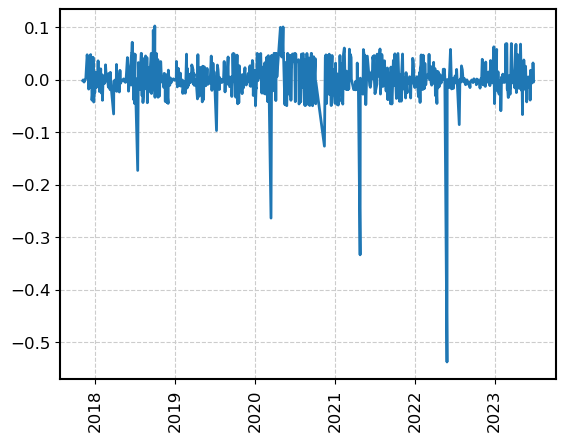

In [16]:
plt.plot(data['daily_return'])
plt.xticks(rotation=90)

(array([17167., 17532., 17897., 18262., 18628., 18993., 19358.]),
 [Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

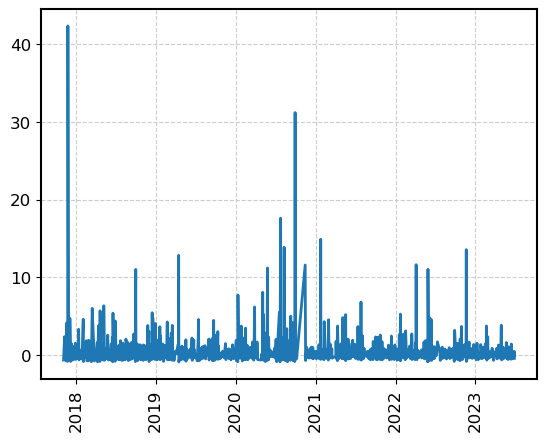

In [17]:
plt.plot(data['vol_change'])
plt.xticks(rotation=90)

<Axes: xlabel='daily_return', ylabel='Probability'>

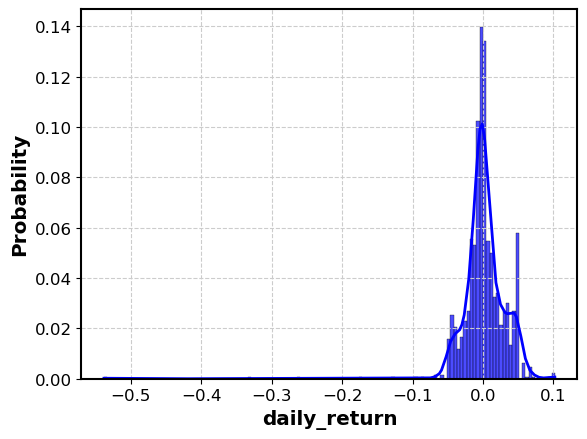

In [18]:
sns.histplot(data['daily_return'],stat='probability',
            kde=True,alpha=0.7,color='blue')

In [19]:
data['daily_return'].describe()

count    1258.000000
mean        0.001731
std         0.032206
min        -0.538035
25%        -0.009976
50%        -0.000222
75%         0.015107
max         0.102004
Name: daily_return, dtype: float64

In [20]:
import ta
data['rsi'] = ta.momentum.rsi(data['open'],4)
data

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi
Date,,,,,,,,
2017-11-05,1470.0,1451.0,4542059,NaN,NaN,NaN,NaN,NaN
2017-11-06,1451.0,1448.0,1429222,1451.0,4542059.0,-0.002068,-0.685336,NaN
2017-11-07,1448.0,1443.0,2423801,1448.0,1429222.0,-0.003453,0.695888,NaN
2017-11-08,1443.0,1442.0,1194668,1443.0,2423801.0,-0.000693,-0.507110,0.000000
2017-11-11,1442.0,1435.0,3991165,1442.0,1194668.0,-0.004854,2.340815,0.000000
...,...,...,...,...,...,...,...,...
2023-06-24,5700.0,5700.0,30091181,5700.0,36309847.0,0.000000,-0.171267,32.855804
2023-06-25,5700.0,5880.0,32215036,5700.0,30091181.0,0.031579,0.070581,32.855804
2023-06-26,5880.0,6000.0,26136861,5880.0,32215036.0,0.020408,-0.188675,79.021798


(array([17167., 17532., 17897., 18262., 18628., 18993., 19358.]),
 [Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

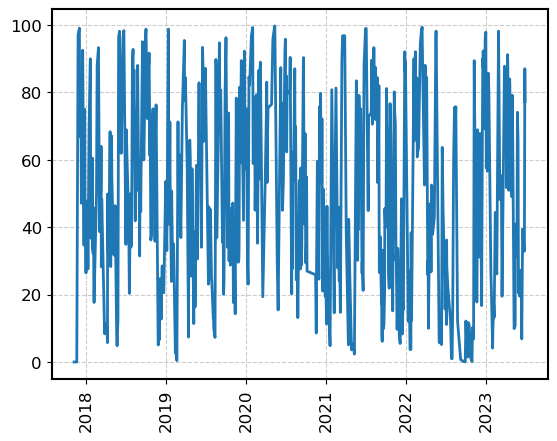

In [21]:
plt.plot(data['rsi'])
plt.xticks(rotation=90)

In [22]:
from sklearn.preprocessing import MinMaxScaler
data['rsi_scaled'] = MinMaxScaler().fit_transform(data[['rsi']])

In [23]:
data.loc['2023-06-24']

open            5.700000e+03
close           5.700000e+03
volume          3.009118e+07
close_shift     5.700000e+03
volum_shift     3.630985e+07
daily_return    0.000000e+00
vol_change     -1.712667e-01
rsi             3.285580e+01
rsi_scaled      3.296855e-01
Name: 2023-06-24 00:00:00, dtype: float64

In [24]:
conditions = [data['daily_return']<0,data['daily_return']>=0]
conditions

[Date
 2017-11-05    False
 2017-11-06     True
 2017-11-07     True
 2017-11-08     True
 2017-11-11     True
               ...  
 2023-06-24    False
 2023-06-25    False
 2023-06-26    False
 2023-06-27     True
 2023-06-28     True
 Name: daily_return, Length: 1259, dtype: bool,
 Date
 2017-11-05    False
 2017-11-06    False
 2017-11-07    False
 2017-11-08    False
 2017-11-11    False
               ...  
 2023-06-24     True
 2023-06-25     True
 2023-06-26     True
 2023-06-27    False
 2023-06-28    False
 Name: daily_return, Length: 1259, dtype: bool]

In [25]:
value = [0,1]
data['trend'] = np.select(conditions,value)
data

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2017-11-05,1470.0,1451.0,4542059,NaN,NaN,NaN,NaN,NaN,NaN,0
2017-11-06,1451.0,1448.0,1429222,1451.0,4542059.0,-0.002068,-0.685336,NaN,NaN,0
2017-11-07,1448.0,1443.0,2423801,1448.0,1429222.0,-0.003453,0.695888,NaN,NaN,0
2017-11-08,1443.0,1442.0,1194668,1443.0,2423801.0,-0.000693,-0.507110,0.000000,0.000000,0
2017-11-11,1442.0,1435.0,3991165,1442.0,1194668.0,-0.004854,2.340815,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-24,5700.0,5700.0,30091181,5700.0,36309847.0,0.000000,-0.171267,32.855804,0.329685,1
2023-06-25,5700.0,5880.0,32215036,5700.0,30091181.0,0.031579,0.070581,32.855804,0.329685,1
2023-06-26,5880.0,6000.0,26136861,5880.0,32215036.0,0.020408,-0.188675,79.021798,0.792930,1


In [26]:
data['trend'].value_counts()

0    631
1    628
Name: trend, dtype: int64

In [27]:
data = data.dropna()
data

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2017-11-08,1443.0,1442.0,1194668,1443.0,2423801.0,-0.000693,-0.507110,0.000000,0.000000,0
2017-11-11,1442.0,1435.0,3991165,1442.0,1194668.0,-0.004854,2.340815,0.000000,0.000000,0
2017-11-12,1435.0,1428.0,3290716,1435.0,3991165.0,-0.004878,-0.175500,0.000000,0.000000,0
2017-11-13,1428.0,1422.0,2452590,1428.0,3290716.0,-0.004202,-0.254694,0.000000,0.000000,0
2017-11-14,1422.0,1421.0,965285,1422.0,2452590.0,-0.000703,-0.606422,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-24,5700.0,5700.0,30091181,5700.0,36309847.0,0.000000,-0.171267,32.855804,0.329685,1
2023-06-25,5700.0,5880.0,32215036,5700.0,30091181.0,0.031579,0.070581,32.855804,0.329685,1
2023-06-26,5880.0,6000.0,26136861,5880.0,32215036.0,0.020408,-0.188675,79.021798,0.792930,1


In [28]:
train = data.loc['2017':'2021']
train

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2017-11-08,1443.0,1442.0,1194668,1443.0,2423801.0,-0.000693,-0.507110,0.000000,0.000000,0
2017-11-11,1442.0,1435.0,3991165,1442.0,1194668.0,-0.004854,2.340815,0.000000,0.000000,0
2017-11-12,1435.0,1428.0,3290716,1435.0,3991165.0,-0.004878,-0.175500,0.000000,0.000000,0
2017-11-13,1428.0,1422.0,2452590,1428.0,3290716.0,-0.004202,-0.254694,0.000000,0.000000,0
2017-11-14,1422.0,1421.0,965285,1422.0,2452590.0,-0.000703,-0.606422,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
2021-12-25,9530.0,9880.0,17222441,9530.0,11266085.0,0.036726,0.528698,85.694275,0.859883,1
2021-12-26,9880.0,9840.0,6618440,9880.0,17222441.0,-0.004049,-0.615708,92.025406,0.923412,0
2021-12-27,9840.0,9940.0,8581659,9840.0,6618440.0,0.010163,0.296629,86.211509,0.865073,1


In [29]:
test = data.loc['2022']
test

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2022-01-01,9860.0,9710.0,10392002,9860.0,14629647.0,-0.015213,-0.289661,68.785683,0.690217,0
2022-01-02,9710.0,9690.0,6155115,9710.0,10392002.0,-0.002060,-0.407707,47.234810,0.473969,0
2022-01-03,9690.0,9640.0,8643075,9690.0,6155115.0,-0.005160,0.404210,44.742704,0.448962,0
2022-01-04,9640.0,9570.0,9799872,9640.0,8643075.0,-0.007261,0.133841,38.050837,0.381814,0
2022-01-05,9570.0,9590.0,12399357,9570.0,9799872.0,0.002090,0.265257,29.746159,0.298482,1
...,...,...,...,...,...,...,...,...,...,...
2022-12-24,4498.0,4599.0,39336313,4498.0,16944367.0,0.022454,1.321498,69.155578,0.693929,1
2022-12-25,4599.0,4864.0,84553054,4599.0,39336313.0,0.057621,1.149491,83.772921,0.840604,1
2022-12-26,4864.0,5022.0,55059685,4864.0,84553054.0,0.032484,-0.348815,93.894746,0.942169,1


In [30]:
real = data.loc['2023']
real

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2023-01-01,5090.0,5010.0,58238659,5090.0,113829324.0,-0.015717,-0.488369,65.776469,0.660022,0
2023-01-02,5010.0,5150.0,60532036,5010.0,58238659.0,0.027944,0.039379,57.565846,0.577634,1
2023-01-03,5150.0,5130.0,46467500,5150.0,60532036.0,-0.003883,-0.232349,67.137431,0.673678,0
2023-01-04,5130.0,5080.0,16849244,5130.0,46467500.0,-0.009747,-0.637397,64.371736,0.645926,0
2023-01-07,5080.0,5090.0,32667041,5080.0,16849244.0,0.001969,0.938784,56.599738,0.567940,1
...,...,...,...,...,...,...,...,...,...,...
2023-06-24,5700.0,5700.0,30091181,5700.0,36309847.0,0.000000,-0.171267,32.855804,0.329685,1
2023-06-25,5700.0,5880.0,32215036,5700.0,30091181.0,0.031579,0.070581,32.855804,0.329685,1
2023-06-26,5880.0,6000.0,26136861,5880.0,32215036.0,0.020408,-0.188675,79.021798,0.792930,1


In [32]:
window = 4
X_train = []
y_train = []

for i in range(window,train.shape[0]):
    X_train.append(train.iloc[i-window:i,5])
    y_train.append(train.iloc[i,9])
    
X_train , y_train = np.array(X_train),np.array(y_train)

In [33]:
X_train.shape,y_train.shape

((910, 4), (910,))

In [35]:
n_features = 1
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],n_features)
X_train.shape

(910, 4, 1)

In [37]:
from tensorflow import keras

In [38]:
np.random.seed(1)
from tensorflow import random
random.set_seed(1)



model_1 = keras.models.Sequential()
model_1.add(keras.layers.LSTM(
                            units=32,
                            activation="tanh",
                            recurrent_activation="sigmoid",
                            kernel_initializer="he_normal",
                            input_shape=(X_train.shape[1],X_train.shape[2])))
model_1.add(keras.layers.Dropout(0.5))
model_1.add(keras.layers.Dense(units=1,
                              activation="sigmoid",
                              kernel_initializer="he_normal"))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [41]:
opt = keras.optimizers.Adam(learning_rate=0.005)
model_1.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [42]:
model_1.fit(X_train,y_train,epochs=250,batch_size=32,validation_split=0.2)

Epoch 1/250
23/23 [==============================] - 4s 33ms/step - loss: 0.6901 - accuracy: 0.5302 - val_loss: 0.6897 - val_accuracy: 0.4945
Epoch 2/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5343 - val_loss: 0.6895 - val_accuracy: 0.4945
Epoch 3/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.5385 - val_loss: 0.6886 - val_accuracy: 0.4945
Epoch 4/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5591 - val_loss: 0.6881 - val_accuracy: 0.4945
Epoch 5/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.5412 - val_loss: 0.6873 - val_accuracy: 0.5549
Epoch 6/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.5412 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 7/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.5604 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 8/250


Epoch 59/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.5907 - val_loss: 0.7096 - val_accuracy: 0.6099
Epoch 60/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.5824 - val_loss: 0.7067 - val_accuracy: 0.6099
Epoch 61/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.5728 - val_loss: 0.7089 - val_accuracy: 0.5934
Epoch 62/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.5934 - val_loss: 0.7116 - val_accuracy: 0.6099
Epoch 63/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.5810 - val_loss: 0.7086 - val_accuracy: 0.5934
Epoch 64/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.5701 - val_loss: 0.7133 - val_accuracy: 0.6044
Epoch 65/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.5577 - val_loss: 0.7111 - val_accuracy: 0.6044
Epoch 

23/23 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.5865 - val_loss: 0.7230 - val_accuracy: 0.6209
Epoch 117/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6574 - accuracy: 0.5728 - val_loss: 0.7252 - val_accuracy: 0.5989
Epoch 118/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6569 - accuracy: 0.5920 - val_loss: 0.7239 - val_accuracy: 0.6209
Epoch 119/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6532 - accuracy: 0.5865 - val_loss: 0.7272 - val_accuracy: 0.5879
Epoch 120/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6614 - accuracy: 0.5755 - val_loss: 0.7268 - val_accuracy: 0.6044
Epoch 121/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.6016 - val_loss: 0.7231 - val_accuracy: 0.6209
Epoch 122/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6559 - accuracy: 0.5852 - val_loss: 0.7221 - val_accuracy: 0.6209
Epoch 123/250

23/23 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.5989 - val_loss: 0.7240 - val_accuracy: 0.5549
Epoch 174/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6058 - val_loss: 0.7289 - val_accuracy: 0.5330
Epoch 175/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.6058 - val_loss: 0.7267 - val_accuracy: 0.5385
Epoch 176/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6487 - accuracy: 0.6016 - val_loss: 0.7254 - val_accuracy: 0.5495
Epoch 177/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.5824 - val_loss: 0.7269 - val_accuracy: 0.5110
Epoch 178/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.5920 - val_loss: 0.7276 - val_accuracy: 0.5220
Epoch 179/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.5824 - val_loss: 0.7262 - val_accuracy: 0.5659
Epoch 180/250

23/23 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.6209 - val_loss: 0.7384 - val_accuracy: 0.5055
Epoch 231/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6435 - accuracy: 0.6003 - val_loss: 0.7337 - val_accuracy: 0.5110
Epoch 232/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6394 - accuracy: 0.5975 - val_loss: 0.7316 - val_accuracy: 0.5440
Epoch 233/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.5962 - val_loss: 0.7341 - val_accuracy: 0.5549
Epoch 234/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6335 - accuracy: 0.6085 - val_loss: 0.7409 - val_accuracy: 0.5495
Epoch 235/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6440 - accuracy: 0.6058 - val_loss: 0.7347 - val_accuracy: 0.5440
Epoch 236/250
23/23 [==============================] - 0s 4ms/step - loss: 0.6382 - accuracy: 0.6085 - val_loss: 0.7398 - val_accuracy: 0.5440
Epoch 237/250

Text(0.5, 1.0, 'Model 1 : Loss/Epochs')

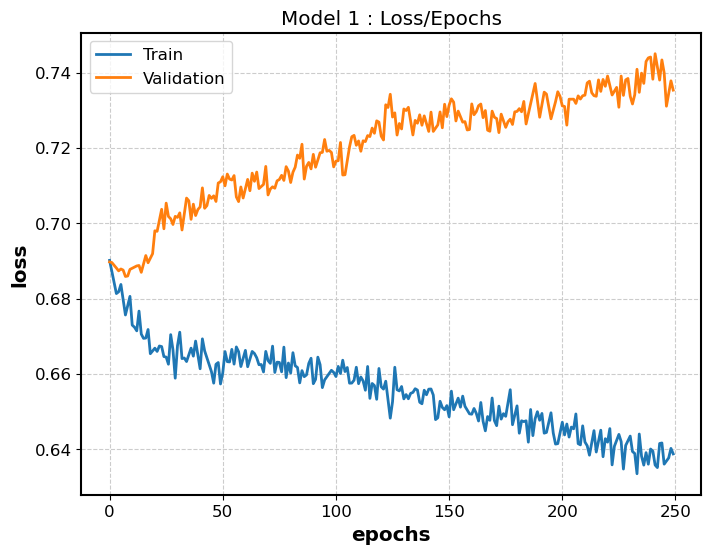

In [48]:
plt.figure(figsize=(8,6))
plt.plot(model_1.history.history["loss"],label="Train")
plt.plot(model_1.history.history["val_loss"],label="Validation")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc="upper left")
plt.title("Model 1 : Loss/Epochs")

Text(0.5, 1.0, 'Model 1 : Accuracy/Epochs')

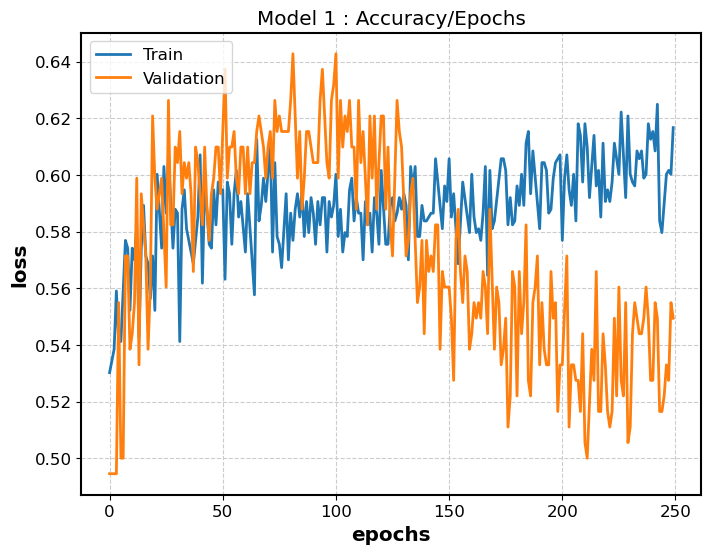

In [49]:
plt.figure(figsize=(8,6))
plt.plot(model_1.history.history["accuracy"],label="Train")
plt.plot(model_1.history.history["val_accuracy"],label="Validation")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc="upper left")
plt.title("Model 1 : Accuracy/Epochs")

In [52]:
X_test = []
y_test = []

for i in range(window,test.shape[0]):
    X_test.append(test.iloc[i-window:i,5])
    y_test.append(test.iloc[i,9])
    
X_test , y_test = np.array(X_test),np.array(y_test)

In [54]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],n_features)
X_test.shape

(225, 4, 1)

In [55]:
y_prob_test = model_1.predict(X_test)
y_prob_test

8/8 [==============================] - 1s 5ms/step


array([[4.6418962e-01],
       [5.0875372e-01],
       [5.3926283e-01],
       [4.3793613e-01],
       [4.6010160e-01],
       [5.1715535e-01],
       [5.7551372e-01],
       [3.6632776e-01],
       [4.5365748e-01],
       [5.1360333e-01],
       [4.4679379e-01],
       [4.6737540e-01],
       [5.5732572e-01],
       [6.8370628e-01],
       [5.3996682e-01],
       [2.9206192e-01],
       [4.0137953e-01],
       [6.1785322e-01],
       [8.6941487e-01],
       [5.4475456e-01],
       [5.5277717e-01],
       [4.8557904e-01],
       [5.1130176e-01],
       [4.8651800e-01],
       [4.8732966e-01],
       [5.4408032e-01],
       [6.2458128e-01],
       [5.3792644e-01],
       [4.0669408e-01],
       [4.7980544e-01],
       [5.1561970e-01],
       [3.1275049e-01],
       [3.9850661e-01],
       [4.7261068e-01],
       [5.6695306e-01],
       [4.8644099e-01],
       [5.0403738e-01],
       [5.0976825e-01],
       [5.1933151e-01],
       [5.1447290e-01],
       [5.2634066e-01],
       [5.205957

In [56]:
y_pred_test = [1 if _ > 0.5 else 0 for _ in y_prob_test]

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

[[64 64]
 [46 51]]


In [58]:
# Accuracy = (TP +TN)/Total sample
accuracy = (65+51)/(64+64+46+51)
accuracy

0.5155555555555555

In [59]:
# Presion = TP /(TP+FP)
presion = 51/(51+64)
presion

0.4434782608695652

In [60]:
# Sensitivity = TP/(TP+FN)
sensitivity= 51/(51+46)
sensitivity

0.5257731958762887

In [61]:
# Spicifity = TN /(TN+FP)
spicifity = 64/(64+64)
spicifity

0.5

In [64]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.LSTM(
                            units=32,
                            activation="tanh",
                            recurrent_activation="sigmoid",
                            return_sequences=True,
                            kernel_initializer="he_normal",
                            input_shape=(X_train.shape[1],X_train.shape[2])))
model_2.add(keras.layers.Dropout(0.5))
model_2.add(keras.layers.LSTM(units=32,kernel_initializer="he_normal"))
model_2.add(keras.layers.Dropout(0.5))
model_2.add(keras.layers.Dense(units=1,
                              activation="sigmoid",
                              kernel_initializer="he_normal"))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4, 32)             4352      
                                                                 
 dropout_1 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [65]:
opt = keras.optimizers.Adam(learning_rate=0.005)
model_2.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [66]:
model_2.fit(X_train,y_train,epochs=250,batch_size=32,validation_split=0.2)

Epoch 1/250
23/23 [==============================] - 6s 56ms/step - loss: 0.6930 - accuracy: 0.5234 - val_loss: 0.6919 - val_accuracy: 0.5055
Epoch 2/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6955 - accuracy: 0.5275 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 3/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5467 - val_loss: 0.6912 - val_accuracy: 0.5055
Epoch 4/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5261 - val_loss: 0.6910 - val_accuracy: 0.5055
Epoch 5/250
23/23 [==============================] - 0s 7ms/step - loss: 0.6866 - accuracy: 0.5426 - val_loss: 0.6898 - val_accuracy: 0.4945
Epoch 6/250
23/23 [==============================] - 0s 7ms/step - loss: 0.6856 - accuracy: 0.5192 - val_loss: 0.6889 - val_accuracy: 0.4890
Epoch 7/250
23/23 [==============================] - 0s 7ms/step - loss: 0.6873 - accuracy: 0.5316 - val_loss: 0.6872 - val_accuracy: 0.5879
Epoch 8/250


Epoch 59/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6561 - accuracy: 0.6058 - val_loss: 0.7087 - val_accuracy: 0.5934
Epoch 60/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6660 - accuracy: 0.5824 - val_loss: 0.7055 - val_accuracy: 0.6099
Epoch 61/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6593 - accuracy: 0.5783 - val_loss: 0.7072 - val_accuracy: 0.5989
Epoch 62/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6618 - accuracy: 0.5797 - val_loss: 0.7095 - val_accuracy: 0.5879
Epoch 63/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.5783 - val_loss: 0.6939 - val_accuracy: 0.6154
Epoch 64/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6622 - accuracy: 0.5646 - val_loss: 0.7027 - val_accuracy: 0.5824
Epoch 65/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.5824 - val_loss: 0.7060 - val_accuracy: 0.5824
Epoch 

23/23 [==============================] - 0s 5ms/step - loss: 0.6526 - accuracy: 0.5962 - val_loss: 0.7180 - val_accuracy: 0.5220
Epoch 117/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6423 - accuracy: 0.6030 - val_loss: 0.7190 - val_accuracy: 0.5440
Epoch 118/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6410 - accuracy: 0.6071 - val_loss: 0.7169 - val_accuracy: 0.5495
Epoch 119/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6428 - accuracy: 0.6058 - val_loss: 0.7135 - val_accuracy: 0.5659
Epoch 120/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6551 - accuracy: 0.6071 - val_loss: 0.7177 - val_accuracy: 0.5495
Epoch 121/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6597 - accuracy: 0.5907 - val_loss: 0.7166 - val_accuracy: 0.5330
Epoch 122/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6410 - accuracy: 0.6154 - val_loss: 0.7229 - val_accuracy: 0.5220
Epoch 123/250

23/23 [==============================] - 0s 6ms/step - loss: 0.6311 - accuracy: 0.5948 - val_loss: 0.7325 - val_accuracy: 0.5385
Epoch 174/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6274 - accuracy: 0.6099 - val_loss: 0.7238 - val_accuracy: 0.5495
Epoch 175/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6332 - accuracy: 0.5852 - val_loss: 0.7215 - val_accuracy: 0.5769
Epoch 176/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6216 - accuracy: 0.6168 - val_loss: 0.7184 - val_accuracy: 0.5934
Epoch 177/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6307 - accuracy: 0.5975 - val_loss: 0.7226 - val_accuracy: 0.5879
Epoch 178/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6226 - accuracy: 0.6181 - val_loss: 0.7323 - val_accuracy: 0.5659
Epoch 179/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6291 - accuracy: 0.5865 - val_loss: 0.7137 - val_accuracy: 0.6044
Epoch 180/250

23/23 [==============================] - 0s 5ms/step - loss: 0.6060 - accuracy: 0.6387 - val_loss: 0.7747 - val_accuracy: 0.5495
Epoch 231/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6425 - accuracy: 0.6058 - val_loss: 0.7608 - val_accuracy: 0.5275
Epoch 232/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6188 - accuracy: 0.6250 - val_loss: 0.7530 - val_accuracy: 0.5549
Epoch 233/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6119 - accuracy: 0.6181 - val_loss: 0.7674 - val_accuracy: 0.5714
Epoch 234/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.6044 - val_loss: 0.7751 - val_accuracy: 0.5330
Epoch 235/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6196 - accuracy: 0.6236 - val_loss: 0.7762 - val_accuracy: 0.5549
Epoch 236/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6054 - accuracy: 0.6415 - val_loss: 0.7685 - val_accuracy: 0.5549
Epoch 237/250

Text(0.5, 1.0, 'Model 2 : Loss/Epochs')

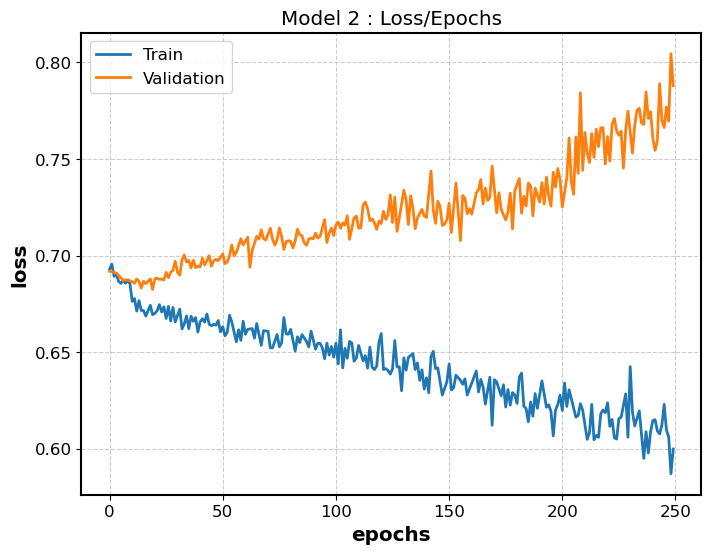

In [67]:
plt.figure(figsize=(8,6))
plt.plot(model_2.history.history["loss"],label="Train")
plt.plot(model_2.history.history["val_loss"],label="Validation")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc="upper left")
plt.title("Model 2 : Loss/Epochs")

Text(0.5, 1.0, 'Model 1 : Accuracy/Epochs')

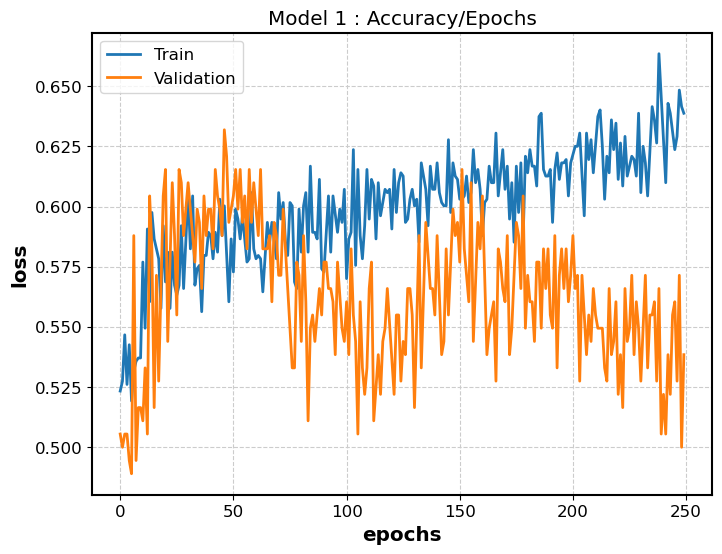

In [69]:
plt.figure(figsize=(8,6))
plt.plot(model_2.history.history["accuracy"],label="Train")
plt.plot(model_2.history.history["val_accuracy"],label="Validation")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc="upper left")
plt.title("Model 1 : Accuracy/Epochs")

In [70]:
y_prob_test = model_2.predict(X_test)
y_prob_test

8/8 [==============================] - 1s 2ms/step


array([[0.4680375 ],
       [0.5233486 ],
       [0.5553027 ],
       [0.44961625],
       [0.48206297],
       [0.5223236 ],
       [0.5561731 ],
       [0.4063879 ],
       [0.47839844],
       [0.5144655 ],
       [0.40984905],
       [0.35920474],
       [0.6575475 ],
       [0.60274345],
       [0.5550593 ],
       [0.48222485],
       [0.40077758],
       [0.9587618 ],
       [0.9803947 ],
       [0.49466923],
       [0.531719  ],
       [0.216104  ],
       [0.5629331 ],
       [0.35360733],
       [0.47432756],
       [0.5546973 ],
       [0.5659665 ],
       [0.5415748 ],
       [0.13675319],
       [0.43032113],
       [0.60499316],
       [0.19984679],
       [0.36124167],
       [0.55534005],
       [0.5741819 ],
       [0.49639705],
       [0.53352684],
       [0.5428197 ],
       [0.55177426],
       [0.5562667 ],
       [0.5675489 ],
       [0.57059836],
       [0.8963083 ],
       [0.622539  ],
       [0.6071522 ],
       [0.60505116],
       [0.5332548 ],
       [0.669

In [71]:
y_pred_test = [1 if _ > 0.5 else 0 for _ in y_prob_test]

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

[[43 85]
 [39 58]]


In [75]:
# Accuracy = (TP +TN)/Total sample
accuracy = (43+58)/(43+85+39+58)
accuracy

0.4488888888888889

In [76]:
# Presion = TP /(TP+FP)
presion = 58/(58+85)
presion

0.40559440559440557

In [77]:
# Sensitivity = TP/(TP+FN)
sensitivity=58/(58+39)
sensitivity

0.5979381443298969

In [78]:
# Spicifity = TN /(TN+FP)
spicifity = 43/(43+85)
spicifity

0.3359375

In [79]:
train.head()

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2017-11-08,1443.0,1442.0,1194668,1443.0,2423801.0,-0.000693,-0.507110,0.0,0.0,0
2017-11-11,1442.0,1435.0,3991165,1442.0,1194668.0,-0.004854,2.340815,0.0,0.0,0
2017-11-12,1435.0,1428.0,3290716,1435.0,3991165.0,-0.004878,-0.175500,0.0,0.0,0
2017-11-13,1428.0,1422.0,2452590,1428.0,3290716.0,-0.004202,-0.254694,0.0,0.0,0
2017-11-14,1422.0,1421.0,965285,1422.0,2452590.0,-0.000703,-0.606422,0.0,0.0,0


In [88]:
train.columns.get_loc('rsi_scaled')

8

In [90]:
X_train = []
y_train = []

for i in range(window,train.shape[0]):
    X_train.append(train.iloc[i-window:i,[5,6,8]])
    y_train.append(train.iloc[i,9])
    
X_train , y_train = np.array(X_train),np.array(y_train)

In [91]:
model_3 = keras.models.Sequential()
model_3.add(keras.layers.LSTM(
                            units=32,
                            activation="tanh",
                            recurrent_activation="sigmoid",
                            return_sequences=True,
                            kernel_initializer="he_normal",
                            input_shape=(X_train.shape[1],X_train.shape[2])))
model_3.add(keras.layers.Dropout(0.5))
model_3.add(keras.layers.LSTM(units=32,kernel_initializer="he_normal"))
model_3.add(keras.layers.Dropout(0.5))
model_3.add(keras.layers.Dense(units=1,
                              activation="sigmoid",
                              kernel_initializer="he_normal"))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 32)             4608      
                                                                 
 dropout_3 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,961
Trainable params: 12,961
Non-trainable params: 0
_________________________________________________________________


In [92]:
opt = keras.optimizers.Adam(learning_rate=0.005)
model_3.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [93]:
model_3.fit(X_train,y_train,epochs=150,batch_size=32,validation_split=0.2)

Epoch 1/150
23/23 [==============================] - 6s 54ms/step - loss: 0.6996 - accuracy: 0.5165 - val_loss: 0.6893 - val_accuracy: 0.5714
Epoch 2/150
23/23 [==============================] - 0s 5ms/step - loss: 0.6964 - accuracy: 0.5165 - val_loss: 0.6890 - val_accuracy: 0.5330
Epoch 3/150
23/23 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5398 - val_loss: 0.6898 - val_accuracy: 0.5440
Epoch 4/150
23/23 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.5412 - val_loss: 0.6895 - val_accuracy: 0.5879
Epoch 5/150
23/23 [==============================] - 0s 5ms/step - loss: 0.6779 - accuracy: 0.5563 - val_loss: 0.6897 - val_accuracy: 0.5714
Epoch 6/150
23/23 [==============================] - 0s 5ms/step - loss: 0.6815 - accuracy: 0.5412 - val_loss: 0.6894 - val_accuracy: 0.5549
Epoch 7/150
23/23 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.5481 - val_loss: 0.6907 - val_accuracy: 0.5659
Epoch 8/150


Epoch 59/150
23/23 [==============================] - 0s 6ms/step - loss: 0.5213 - accuracy: 0.7253 - val_loss: 0.8950 - val_accuracy: 0.4560
Epoch 60/150
23/23 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.7294 - val_loss: 0.9106 - val_accuracy: 0.4505
Epoch 61/150
23/23 [==============================] - 0s 6ms/step - loss: 0.5326 - accuracy: 0.7349 - val_loss: 0.9228 - val_accuracy: 0.4560
Epoch 62/150
23/23 [==============================] - 0s 6ms/step - loss: 0.5262 - accuracy: 0.7390 - val_loss: 0.9236 - val_accuracy: 0.4341
Epoch 63/150
23/23 [==============================] - 0s 6ms/step - loss: 0.5101 - accuracy: 0.7610 - val_loss: 0.9189 - val_accuracy: 0.4615
Epoch 64/150
23/23 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.7376 - val_loss: 0.9371 - val_accuracy: 0.4505
Epoch 65/150
23/23 [==============================] - 0s 7ms/step - loss: 0.5169 - accuracy: 0.7486 - val_loss: 0.9449 - val_accuracy: 0.4505
Epoch 

23/23 [==============================] - 0s 6ms/step - loss: 0.2830 - accuracy: 0.8874 - val_loss: 1.4575 - val_accuracy: 0.4725
Epoch 117/150
23/23 [==============================] - 0s 6ms/step - loss: 0.3105 - accuracy: 0.8626 - val_loss: 1.5101 - val_accuracy: 0.4890
Epoch 118/150
23/23 [==============================] - 0s 6ms/step - loss: 0.2964 - accuracy: 0.8626 - val_loss: 1.5046 - val_accuracy: 0.4670
Epoch 119/150
23/23 [==============================] - 0s 5ms/step - loss: 0.3133 - accuracy: 0.8558 - val_loss: 1.4916 - val_accuracy: 0.5220
Epoch 120/150
23/23 [==============================] - 0s 6ms/step - loss: 0.2957 - accuracy: 0.8516 - val_loss: 1.4444 - val_accuracy: 0.4945
Epoch 121/150
23/23 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.8736 - val_loss: 1.5240 - val_accuracy: 0.4725
Epoch 122/150
23/23 [==============================] - 0s 6ms/step - loss: 0.2768 - accuracy: 0.8832 - val_loss: 1.5205 - val_accuracy: 0.4890
Epoch 123/150

Text(0.5, 1.0, 'Model 2 : Loss/Epochs')

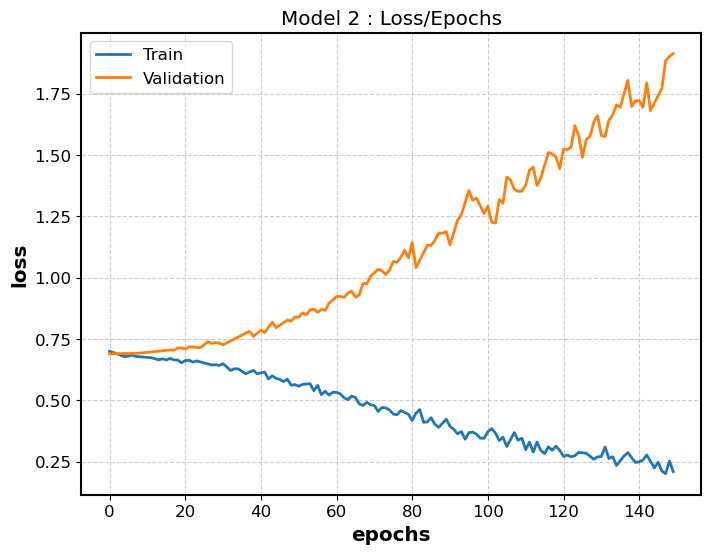

In [94]:
plt.figure(figsize=(8,6))
plt.plot(model_3.history.history["loss"],label="Train")
plt.plot(model_3.history.history["val_loss"],label="Validation")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc="upper left")
plt.title("Model 2 : Loss/Epochs")

Text(0.5, 1.0, 'Model 1 : Accuracy/Epochs')

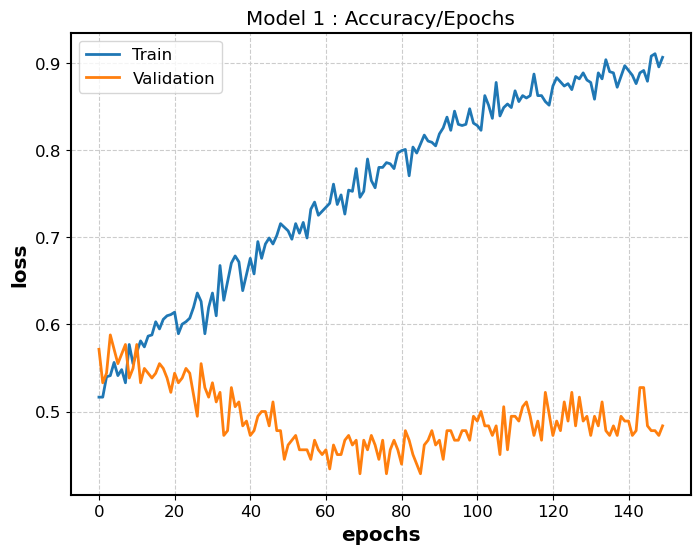

In [95]:
plt.figure(figsize=(8,6))
plt.plot(model_3.history.history["accuracy"],label="Train")
plt.plot(model_3.history.history["val_accuracy"],label="Validation")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc="upper left")
plt.title("Model 1 : Accuracy/Epochs")

In [97]:
X_test = []
y_test = []

for i in range(window,test.shape[0]):
    X_test.append(test.iloc[i-window:i,[5,6,8]])
    y_test.append(test.iloc[i,9])
    
X_test , y_test = np.array(X_test),np.array(y_test)

In [98]:
y_prob_test = model_3.predict(X_test)
y_prob_test

8/8 [==============================] - 1s 2ms/step


array([[3.5121477e-01],
       [3.4688553e-01],
       [9.4464403e-01],
       [1.3520826e-01],
       [2.4490559e-01],
       [1.5496984e-01],
       [9.7920233e-01],
       [4.7363322e-02],
       [2.0439759e-01],
       [6.8784171e-01],
       [9.9179155e-01],
       [2.4120305e-03],
       [4.7548320e-03],
       [9.9958307e-01],
       [9.9993652e-01],
       [8.6275220e-01],
       [9.4611192e-01],
       [9.8823595e-01],
       [4.5505926e-01],
       [7.7288509e-03],
       [9.9121976e-01],
       [5.6015438e-01],
       [7.9646057e-01],
       [9.1385424e-01],
       [9.6817577e-01],
       [9.8373312e-01],
       [1.9101832e-02],
       [2.5598062e-02],
       [2.2807801e-01],
       [3.0378147e-03],
       [9.2236483e-01],
       [7.5796467e-01],
       [4.0348253e-04],
       [1.1818839e-01],
       [5.7569259e-01],
       [8.5179564e-03],
       [8.9786541e-01],
       [1.4323264e-02],
       [2.4853976e-02],
       [9.8910564e-01],
       [5.1099503e-01],
       [5.599043

In [99]:
y_pred_test = [1 if _ > 0.5 else 0 for _ in y_prob_test]

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

[[55 73]
 [52 45]]


In [101]:
# Accuracy = (TP +TN)/Total sample
accuracy = (55+45)/(55+73+52+45)
accuracy

0.4444444444444444

In [102]:
# Presion = TP /(TP+FP)
presion = 45/(45+73)
presion

0.3813559322033898

In [103]:
# Sensitivity = TP/(TP+FN)
sensitivity=45/(45+52)
sensitivity

0.4639175257731959

In [104]:
# Spicifity = TN /(TN+FP)
spicifity = 55/(55+73)
spicifity

0.4296875

In [106]:
X_real = []
y_real = []

for i in range(window,real.shape[0]):
    X_real.append(train.iloc[i-window:i,[5,6,8]])
    y_real.append(train.iloc[i,9])
    
X_real , y_real = np.array(X_real),np.array(y_real)

In [117]:
X_real.shape

(109, 4, 3)

In [107]:
y_prob_real = model_3.predict(X_real)
y_prob_real

4/4 [==============================] - 0s 2ms/step


array([[8.37226806e-04],
       [2.22335756e-03],
       [9.89060819e-01],
       [9.99950886e-01],
       [9.99364376e-01],
       [9.99602556e-01],
       [9.99990582e-01],
       [9.99973238e-01],
       [8.12460840e-01],
       [9.99461412e-01],
       [6.07545837e-04],
       [4.82045405e-04],
       [9.72967148e-01],
       [9.57705677e-01],
       [3.01448375e-01],
       [5.74838370e-02],
       [9.99993265e-01],
       [9.99960482e-01],
       [9.99062359e-01],
       [9.99814510e-01],
       [3.38097513e-01],
       [3.07577197e-03],
       [4.65860394e-05],
       [2.88517040e-04],
       [9.99325693e-01],
       [9.99905229e-01],
       [9.52472448e-01],
       [2.86465976e-04],
       [6.13950014e-01],
       [2.80353338e-01],
       [8.35325476e-03],
       [9.99867916e-01],
       [3.91463423e-03],
       [5.08983852e-03],
       [7.34233141e-01],
       [1.50831090e-02],
       [4.17981930e-02],
       [2.59033114e-01],
       [5.53657711e-01],
       [9.99593198e-01],


In [108]:
y_pred_real = [1 if _ > 0.5 else 0 for _ in y_prob_real]

In [109]:
real_tr = real[4:]

In [112]:
real_tr

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi,rsi_scaled,trend,pred,balance
Date,,,,,,,,,,,,
2023-01-07,5080.0,5090.0,32667041,5080.0,16849244.0,0.001969,0.938784,56.599738,0.567940,1,0,0
2023-01-08,5090.0,5260.0,81195687,5090.0,32667041.0,0.033399,1.485554,57.953481,0.581523,1,0,0
2023-01-09,5260.0,5230.0,172993033,5260.0,81195687.0,-0.005703,1.130569,75.368463,0.756271,0,1,0
2023-01-10,5230.0,5530.0,266767540,5230.0,172993033.0,0.057361,0.542071,68.675676,0.689113,1,1,0
2023-01-11,5530.0,5500.0,121066718,5530.0,266767540.0,-0.005425,-0.546171,85.657439,0.859514,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-24,5700.0,5700.0,30091181,5700.0,36309847.0,0.000000,-0.171267,32.855804,0.329685,1,0,0
2023-06-25,5700.0,5880.0,32215036,5700.0,30091181.0,0.031579,0.070581,32.855804,0.329685,1,1,0
2023-06-26,5880.0,6000.0,26136861,5880.0,32215036.0,0.020408,-0.188675,79.021798,0.792930,1,1,0


In [110]:
real_tr["pred"] = y_pred_real

C:\Users\admin\AppData\Local\Temp\ipykernel_1480\4013274617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tr["pred"] = y_pred_real


In [111]:
real_tr["balance"] = 0

C:\Users\admin\AppData\Local\Temp\ipykernel_1480\3164071861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tr["balance"] = 0


In [113]:
real_tr.iloc[0,11] = 1000
real_tr.head()

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi,rsi_scaled,trend,pred,balance
Date,,,,,,,,,,,,
2023-01-07,5080.0,5090.0,32667041,5080.0,16849244.0,0.001969,0.938784,56.599738,0.567940,1,0,1000
2023-01-08,5090.0,5260.0,81195687,5090.0,32667041.0,0.033399,1.485554,57.953481,0.581523,1,0,0
2023-01-09,5260.0,5230.0,172993033,5260.0,81195687.0,-0.005703,1.130569,75.368463,0.756271,0,1,0
2023-01-10,5230.0,5530.0,266767540,5230.0,172993033.0,0.057361,0.542071,68.675676,0.689113,1,1,0
2023-01-11,5530.0,5500.0,121066718,5530.0,266767540.0,-0.005425,-0.546171,85.657439,0.859514,0,1,0


In [114]:
for i in range(1,real_tr.shape[0]):
    if real_tr.iloc[i,10] == 1:
        real_tr.iloc[i,11] = real_tr.iloc[i-1,11] * real_tr.iloc[i,1] / real_tr.iloc[i,0]
    if real_tr.iloc[i,10] == 0:
        real_tr.iloc[i,11] = real_tr.iloc[i-1,11] * real_tr.iloc[i,0] / real_tr.iloc[i,1]

In [115]:
real_tr

,open,close,volume,close_shift,volum_shift,daily_return,vol_change,rsi,rsi_scaled,trend,pred,balance
Date,,,,,,,,,,,,
2023-01-07,5080.0,5090.0,32667041,5080.0,16849244.0,0.001969,0.938784,56.599738,0.567940,1,0,1000.000000
2023-01-08,5090.0,5260.0,81195687,5090.0,32667041.0,0.033399,1.485554,57.953481,0.581523,1,0,967.680608
2023-01-09,5260.0,5230.0,172993033,5260.0,81195687.0,-0.005703,1.130569,75.368463,0.756271,0,1,962.161517
2023-01-10,5230.0,5530.0,266767540,5230.0,172993033.0,0.057361,0.542071,68.675676,0.689113,1,1,1017.352427
2023-01-11,5530.0,5500.0,121066718,5530.0,266767540.0,-0.005425,-0.546171,85.657439,0.859514,0,1,1011.833336
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-24,5700.0,5700.0,30091181,5700.0,36309847.0,0.000000,-0.171267,32.855804,0.329685,1,0,1375.434933
2023-06-25,5700.0,5880.0,32215036,5700.0,30091181.0,0.031579,0.070581,32.855804,0.329685,1,1,1418.869721
2023-06-26,5880.0,6000.0,26136861,5880.0,32215036.0,0.020408,-0.188675,79.021798,0.792930,1,1,1447.826245


Text(0.5, 1.0, 'Model 3')

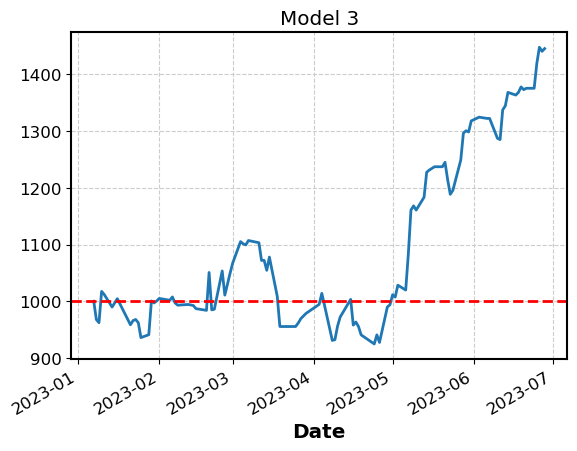

In [119]:
real_tr.iloc[:,11].plot()
plt.axhline(1000,color='red',linestyle='--')
plt.title('Model 3')

In [121]:
X_real = []
y_real = []

for i in range(window,real.shape[0]):
    X_real.append(train.iloc[i-window:i,5])
    y_real.append(train.iloc[i,9])
    
X_real , y_real = np.array(X_real),np.array(y_real)

In [123]:
X_real = X_real.reshape(X_real.shape[0],X_real.shape[1],n_features)
X_real.shape

(109, 4, 1)

In [124]:
y_prob_real = model_1.predict(X_real)
y_pred_real = [1 if _ > 0.5 else 0 for _ in y_prob_real]
real_tr["pred"] = y_pred_real
real_tr["balance"] = 0
real_tr.iloc[0,11] = 1000
for i in range(1,real_tr.shape[0]):
    if real_tr.iloc[i,10] == 1:
        real_tr.iloc[i,11] = real_tr.iloc[i-1,11] * real_tr.iloc[i,1] / real_tr.iloc[i,0]
    if real_tr.iloc[i,10] == 0:
        real_tr.iloc[i,11] = real_tr.iloc[i-1,11] * real_tr.iloc[i,0] / real_tr.iloc[i,1]

4/4 [==============================] - 0s 2ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_1480\2799369915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tr["pred"] = y_pred_real
C:\Users\admin\AppData\Local\Temp\ipykernel_1480\2799369915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tr["balance"] = 0


Text(0.5, 1.0, 'Model 3')

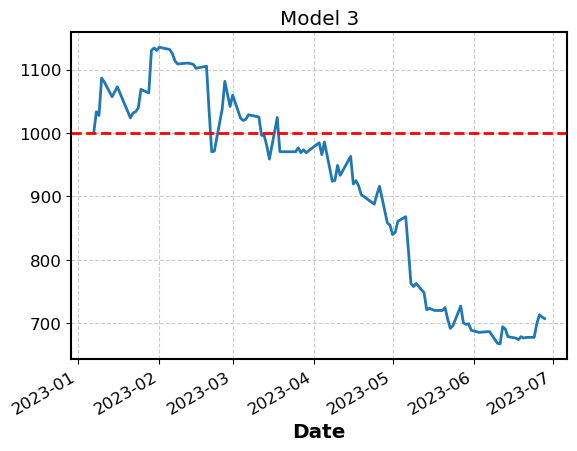

In [125]:
real_tr.iloc[:,11].plot()
plt.axhline(1000,color='red',linestyle='--')
plt.title('Model 3')

In [126]:
y_prob_real = model_2.predict(X_real)
y_pred_real = [1 if _ > 0.5 else 0 for _ in y_prob_real]
real_tr["pred"] = y_pred_real
real_tr["balance"] = 0
real_tr.iloc[0,11] = 1000
for i in range(1,real_tr.shape[0]):
    if real_tr.iloc[i,10] == 1:
        real_tr.iloc[i,11] = real_tr.iloc[i-1,11] * real_tr.iloc[i,1] / real_tr.iloc[i,0]
    if real_tr.iloc[i,10] == 0:
        real_tr.iloc[i,11] = real_tr.iloc[i-1,11] * real_tr.iloc[i,0] / real_tr.iloc[i,1]

4/4 [==============================] - 0s 3ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_1480\842981941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tr["pred"] = y_pred_real
C:\Users\admin\AppData\Local\Temp\ipykernel_1480\842981941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_tr["balance"] = 0


Text(0.5, 1.0, 'Model 3')

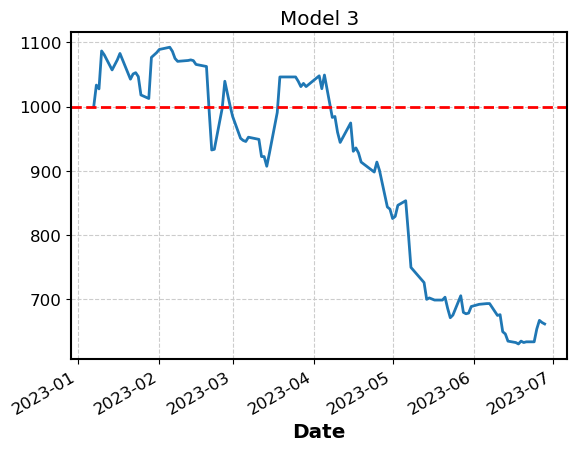

In [127]:
real_tr.iloc[:,11].plot()
plt.axhline(1000,color='red',linestyle='--')
plt.title('Model 3')